# ejercicio 1

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fsolve

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv2
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt


from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

from skimage.filters import threshold_otsu


import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt


from ipynb.fs.full.toolbox import *

import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv2
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt


from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

from skimage.filters import threshold_otsu


import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt

from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.segmentation import clear_border
from skimage.color import lab2rgb
from skimage.color import label2rgb
from skimage import io, color, filters, measure

in_dir="./data"
txt_name="/irisdata.txt"
data = np.loadtxt(in_dir + txt_name, comments="%")

In [3]:
data.shape

(150, 5)

In [6]:
data.shape
data_iris = data[0:150, 0:4]

In [14]:
# aqui elige le numero de PCA que quieres
# n_components=2
pca = PCA()
pca.fit(data_iris)

# plt.plot(pca.explained_variance_ratio_)
# plt.show()

mn = np.mean(data_iris, axis=0)
x = data_iris-mn

explained_variance_ratio  = pca.explained_variance_ratio_

vectors_2 = pca.components_
# AQUI ABAJO ESTAN LOS PCA SI TE PIDE LO DOS PRIMERO PUES SUMAS LOS DOS PRIMEROS ETC...
print(explained_variance_ratio)

percentage_explained = sum(explained_variance_ratio) * 100

print(f"The first two principal components explain {percentage_explained:.2f}% of the total variation.")

# This is transposed compared to "pc_proj" above
data_transform = pca.transform(x)

[0.92461872 0.05306648 0.01710261 0.00521218]
The first two principal components explain 100.00% of the total variation.


# ejercicio 2

In [15]:
# Función para proyectar los datos de una flor en el espacio PCA
def project_flower_data(data, flower_number, pca_model):
    # Selecciona los datos de la flor especificada por 'flower_number'
    flower_data = data[flower_number - 1, :].reshape(1, -1)

    # Proyecta los datos de la flor en el espacio PCA
    projected_data = pca_model.transform(flower_data)
    
    return projected_data

# Solicitar al usuario el número de la flor que desea estudiar
flower_number = int(input("Introduce el número de la flor que deseas estudiar (1-150): "))

if 1 <= flower_number <= 150:
    # Llama a la función para proyectar los datos de la flor seleccionada
    projected_data = project_flower_data(data_iris, flower_number, pca)

    # Muestra los valores proyectados en el espacio PCA
    print(f"Projected values of flower {flower_number} in PCA space: {projected_data}")
else:
    print("Número de flor fuera del rango válido (1-150).")


Introduce el número de la flor que deseas estudiar (1-150):  1


Projected values of flower 1 in PCA space: [[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]]


# ejercicio 3 - no excato intuible

In [30]:
in_dir = "./data"
im_name = "/sky_gray.png"
im = io.imread(in_dir + im_name)
im_gray = rgb2gray(im)
im_gray = img_as_ubyte(im_gray) #para tenerla en uint8
im_gray.dtype

dtype('uint8')

In [33]:
from ipynb.fs.full.toolbox import *

El tipo de la imagen es:  uint8
el max del hist es : <built-in method max of numpy.ndarray object at 0x0000019F2A1B51D0>
el min del hist es : <built-in method min of numpy.ndarray object at 0x0000019F2A1B51D0>


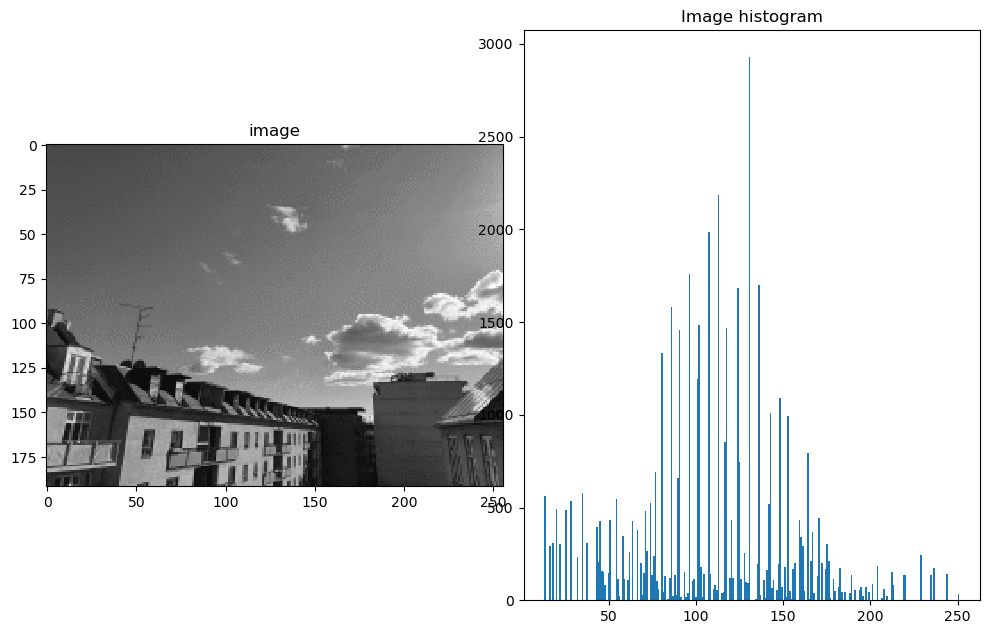


13
---------------


251

In [35]:
img_and_hist(im_gray)
print()
print(im_gray.min())
print("---------------")
im_gray.max()

In [51]:
def histogram_stretch(img_in):
    # ojo aqui al formato de las imagenes de entrada
    # si te dan la img en float quita lod e convertir en float abajo y si te la dan en otro tipo dejalo
    # si me dan el max o min desired en px tengo que tener la imagen en uint8
    # si me dan el max o min desired en float tengo que tener la img en float
    # quitar o poner el 255 de abajo si necesario
    # quieres dividir entre 255 si te dan la img en uint8 y presetntaras el resultado en float
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
        
    
    min_desired = 10/255
    max_desired = 200/255
	
    img_out = ( (max_desired-min_desired) / (max_val-min_val)) * ((img_float-min_val) + min_desired)
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    plt.figure()
    
    plt.subplot(221)
    plt.hist(img_float.ravel())
    plt.title("Histogram before stretching")
    
    plt.subplot(222)
    io.imshow(img_float)
    plt.title("Image before stretching")
    
    plt.subplot(223)
    plt.hist(img_out.ravel())
    plt.title("Histogram after stretching")
    
    plt.subplot(224)
    io.imshow(img_out)
    plt.title("Image after stretching")
    
    plt.show()
    print(f"Max before stretching: {img_float.max():.2f}")
    print(f"Min before stretching: {img_float.min():.2f}\n")
    
    print("Max after stretching:",img_out.max())
    print("Min after stretching:",img_out.min())
    print()
    print(f"Average pixel value after stretching: {img_out.mean():.3f}\n" )
    return img_as_ubyte(img_out)

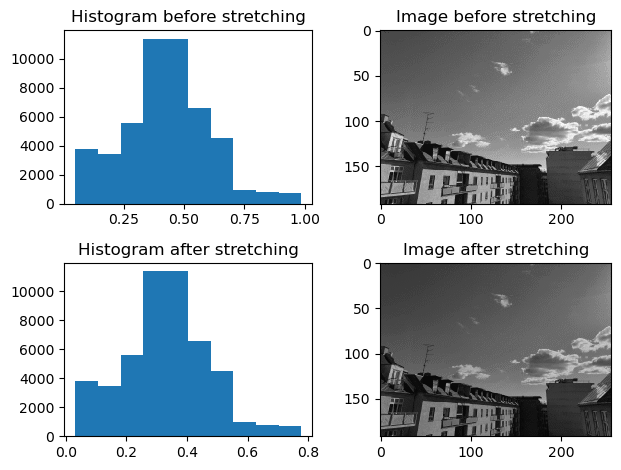

Max before stretching: 0.98
Min before stretching: 0.05

Max after stretching: 0.7764046795188663
Min after stretching: 0.031306640303180096

Average pixel value after stretching: 0.333



In [52]:
img_out = histogram_stretch(im_gray)

# ejercicio 4 - no exacto intuible

In [80]:
in_dir = "./data"
im_name = "/sky.png"
im_sky = io.imread(in_dir + im_name)
# im_sky = rgb2gray(im)
# im_sky = img_as_ubyte(im_gray) #para tenerla en uint8
im_sky.dtype

dtype('uint8')

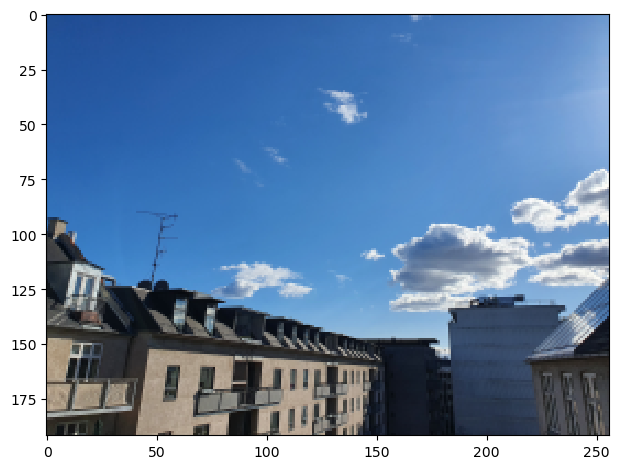

In [81]:
io.imshow(im_sky)

In [82]:
def detect_colors_image(img_in):
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]
    segm = (r_comp > 0) & (r_comp < 100) & (g_comp > 85) & (g_comp < 200) & \
                    (b_comp > 150) & (b_comp < 255)

    return img_as_ubyte(segm)

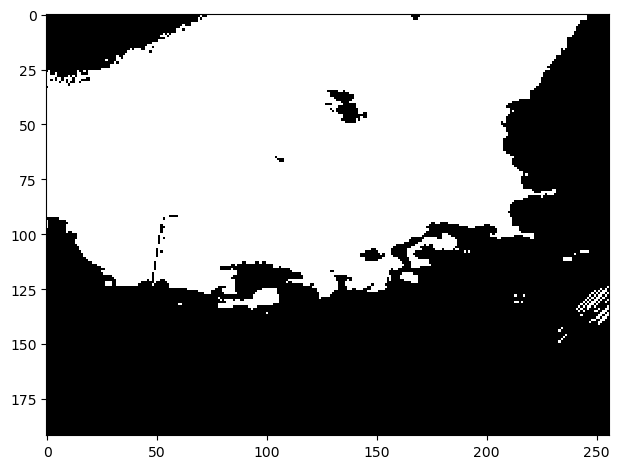

In [83]:
img_th = detect_colors_image(im_sky)
io.imshow(img_th)

In [72]:
def apply_erosion(binary, disk_sz):
    footprint = disk(disk_sz)
    eroded = erosion(binary, footprint)
    return eroded

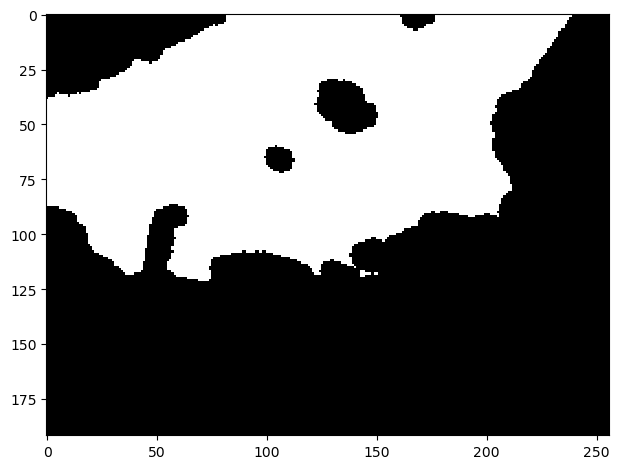

In [74]:
img_eroded = apply_erosion(img_th, 5)
io.imshow(img_eroded)

In [75]:
foreground_pixels = np.sum(img_eroded == 255)
print(f"Number of foreground pixels in the final image: {foreground_pixels}")

Number of foreground pixels in the final image: 19613


# ejercicio 5 - rarete

uint8


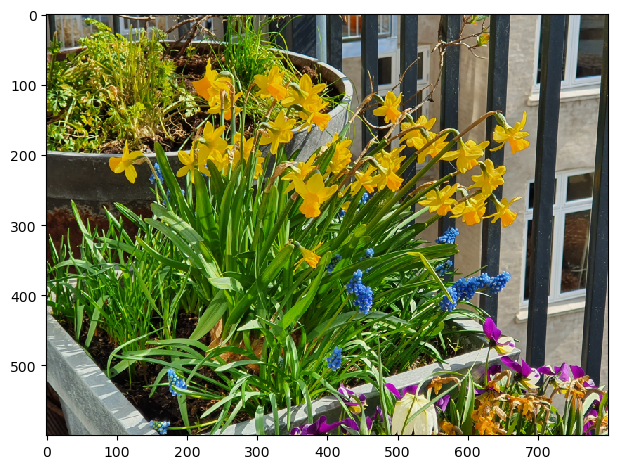

In [95]:
in_dir = "./data"
im_name = "/flower.png"
im_flw = io.imread(in_dir + im_name)
# im_sky = rgb2gray(im)
# im_sky = img_as_ubyte(im_gray) #para tenerla en uint8
print(im_flw.dtype)
io.imshow(im_flw)

In [110]:
def hsv_detection(im):
    hsv_img = color.rgb2hsv(im)

    hue_img = hsv_img[:, :, 0]
    sat_img = hsv_img[:, :, 1]
    value_img = hsv_img[:, :, 2]

    segm = (hue_img > 0) & (hue_img < 0.25) & (sat_img > 0.8) & \
                    (value_img > 0.8)

    return img_as_ubyte(segm)

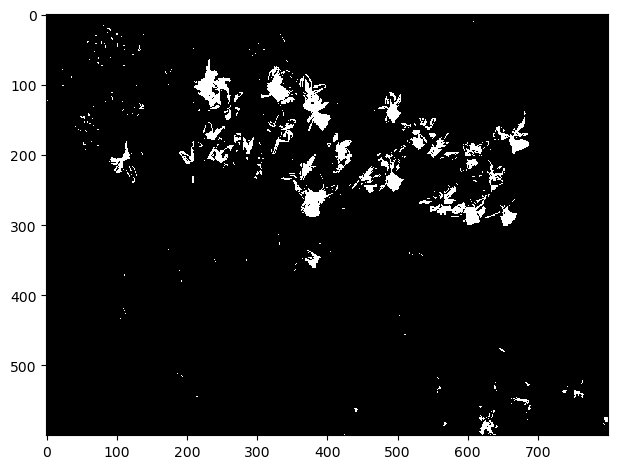

In [111]:
img_th_flw = hsv_detection(im_flw)
io.imshow(img_th_flw)

In [108]:
def apply_opening(binary, disk_sz):
    footprint = disk(disk_sz)
    opened = opening(binary, footprint)
    return opened

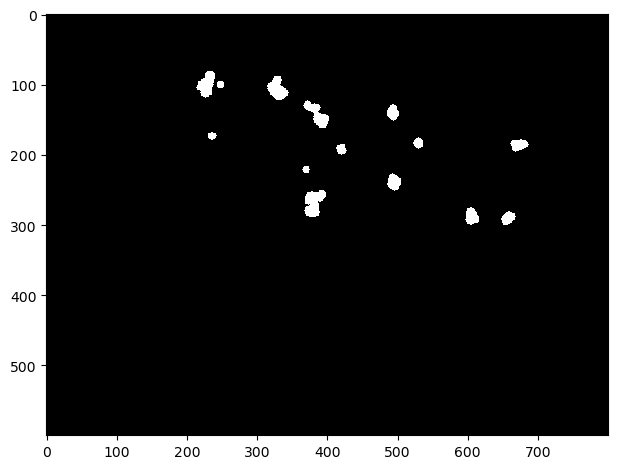

In [112]:
img_opened = apply_opening(img_th_flw, 5)
io.imshow(img_opened)

In [113]:
foreground_pixels = np.sum(img_opened == 255)
print(f"Number of foreground pixels in the final image: {foreground_pixels}")

Number of foreground pixels in the final image: 4948


In [114]:
numbers = [5665, 3421, 8753, 6712, 1340]
target = 4948

# Encuentra el número más cercano a 4948
closest_number = min(numbers, key=lambda x: abs(x - target))

print(f"El número más cercano a 4948 en la lista es: {closest_number}")


El número más cercano a 4948 en la lista es: 5665


# ejercicio 6 - rarete

In [131]:
def explained_variance_by_components(imagenes, num_componentes):
    """
    Calcula la variación total explicada por un número dado de componentes principales.

    :param imagenes: Una matriz donde cada columna es una imagen.
    :param num_componentes: El número de componentes principales para estudiar.
    :return: La variación total explicada por los componentes principales especificados.
    """
    pca = PCA(n_components=num_componentes)
    pca.fit(imagenes)

    variacion_total_explicada = np.sum(pca.explained_variance_ratio_)

    return variacion_total_explicada

ruta_base = './data/car'
extension = '.jpg'
imagenes_grises = []

# //////////////////convertir la iamgen a un stack de imagenes////////////////////////
for i in range(1, 6):
    ruta_imagen = ruta_base + str(i) + extension
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    imagenes_grises.append(imagen)
matriz_imagenes = np.column_stack([imagen.flatten() for imagen in imagenes_grises])
# //////////////////////////////////////////////

num_componentes = 1  # Número de componentes principales a estudiar
variacion_total = explained_variance_by_components(matriz_imagenes, num_componentes)

print(f"Variación total explicada por {num_componentes} componentes principales: {variacion_total:.2%}")

Variación total explicada por 1 componentes principales: 62.10%


# ejercicio 7

In [132]:
in_dir = "./data"
im_name = "/sky_gray.png"
im = io.imread(in_dir + im_name)
im_gray = rgb2gray(im)
im_gray = img_as_ubyte(im_gray) #para tenerla en uint8
im_gray.dtype

dtype('uint8')

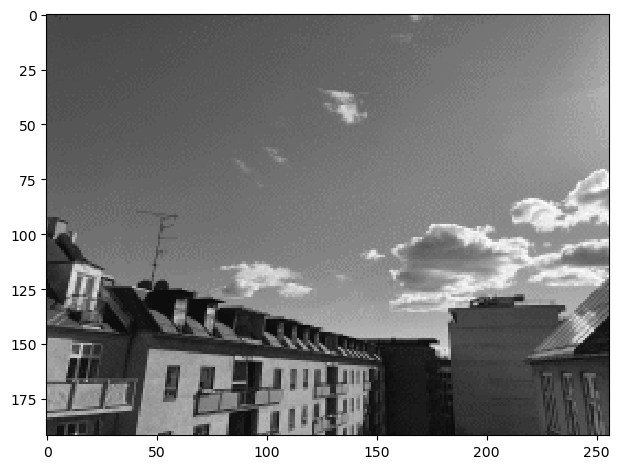

In [133]:
io.imshow(im_gray)

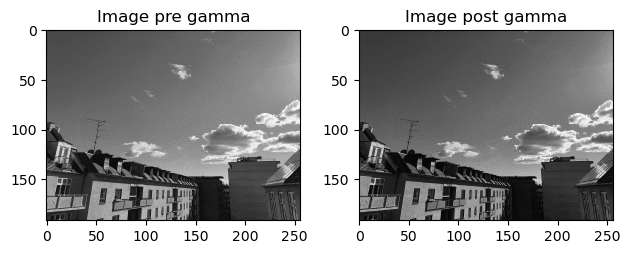

In [134]:
def gamma_map(img, gamma):
    img_float = ski.img_as_float(img)
    img_middle = np.power(img_float,gamma)
    img_out = ski.img_as_ubyte(img_middle)
    
    plt.figure()
    plt.subplot(121)
    io.imshow(img_float)
    plt.title("Image pre gamma")
    
        
    plt.subplot(122)
    io.imshow(img_out)
    plt.title("Image post gamma")
    
    plt.show()
    
    return img_out
    
gamma_img = gamma_map(im_gray, 1.21)

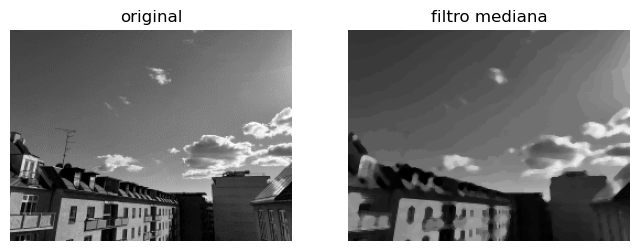

In [135]:
#TA
def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img

med_img = apply_median_filter(gamma_img, 5)
plot_comparison(im_gray, med_img, 'filtro mediana')

In [137]:
# si te piden el valor de un px en un sistema 1-based, como estamos en 
# python tienes que restarle 1, si te dicen 0 based no hagas nada
pixel_value = med_img[40 - 1, 50 - 1]
print(pixel_value)

68


# ejercicio 8

In [138]:
in_dir = "./data"
im_name = "/flowerwall.png"
im = io.imread(in_dir + im_name)
im_flowerwall = rgb2gray(im)
im_flowerwall = img_as_ubyte(im_flowerwall) #para tenerla en uint8
im_flowerwall.dtype

dtype('uint8')

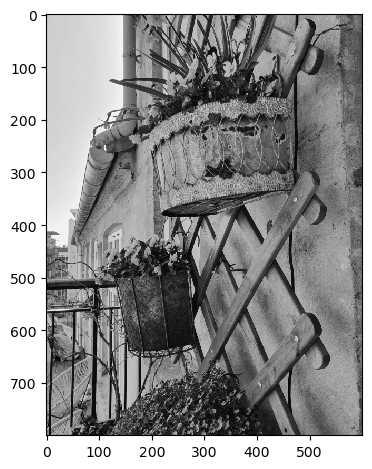

In [139]:
io.imshow(im_flowerwall)

In [147]:
def apply_mean_filter(img, size):
    weights = np.ones([size, size])
    weights = weights / np.sum(weights)
    out_img = correlate(img, weights)
    return out_img

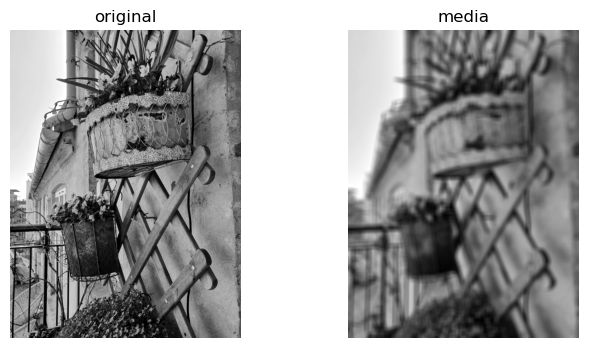

In [148]:
outimg=apply_mean_filter(im_flowerwall, 15)
plot_comparison(im_flowerwall,outimg,'media')

In [149]:
pixel_value = outimg[40 - 1, 50 - 1]
print(pixel_value)

209


# ejercicio 9

In [145]:
in_dir = "./data"
im_name = "/floorboards.png"
im = io.imread(in_dir + im_name)
im_floorboards = rgb2gray(im)
im_floorboards = img_as_ubyte(im_floorboards) #para tenerla en uint8
im_floorboards.dtype

dtype('uint8')

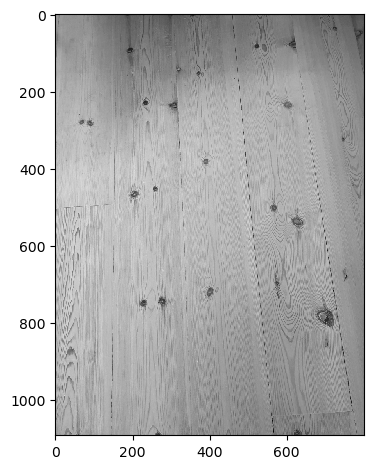

In [146]:
io.imshow(im_floorboards)

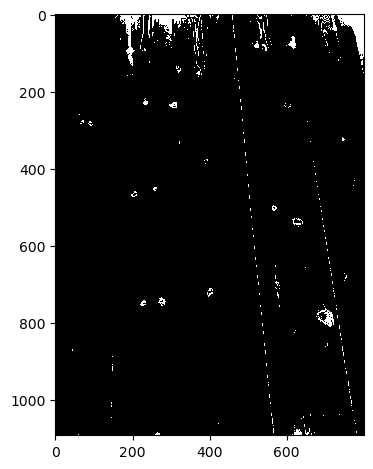

In [153]:
def sesgo_mascara(im, num):
    mask = im < num
    mask2 = img_as_ubyte(mask)
    return mask2
im_floorboards_bin= sesgo_mascara(im_floorboards, 100)
io.imshow(im_floorboards_bin)

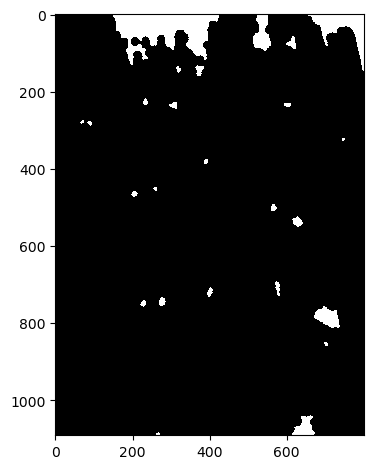

In [156]:
def apply_closing(binary, disk_sz):
    footprint = disk(disk_sz)
    closed = closing(binary, footprint)
    return closed

img_closed_flw = apply_closing(im_floorboards_bin, 10)
io.imshow(img_closed_flw)
im_opened_flw = apply_opening(img_closed_flw, 3)
io.imshow(im_opened_flw)

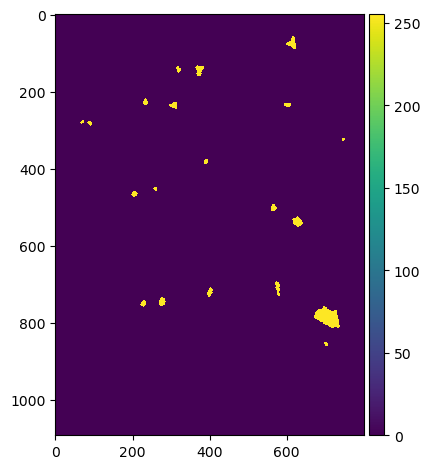

In [165]:
img_no_border = clear_border(im_opened_flw)
io.imshow(img_no_border)

In [166]:
foreground_pixels = np.sum(img_no_border == 255)
print(f"Number of foreground pixels in the final image: {foreground_pixels}")

Number of foreground pixels in the final image: 6491


In [176]:
label_img = measure.label(img_no_border, connectivity=2)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 20


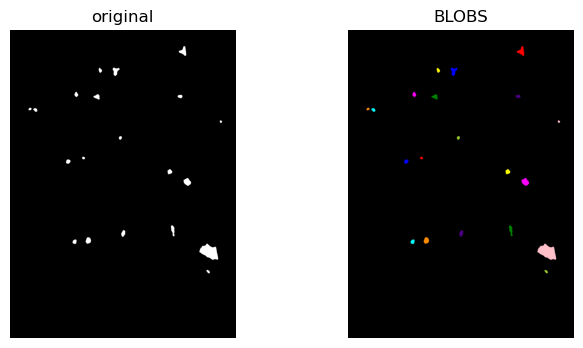

In [177]:
im_blob = label2rgb(label_img)
plot_comparison(img_no_border, im_blob, 'BLOBS')

# ejercicio 10

In [187]:
label_img = measure.label(img_no_border, connectivity=2)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 20


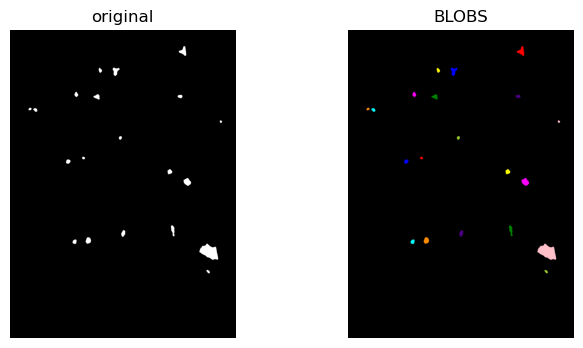

In [188]:
im_blob = label2rgb(label_img)
plot_comparison(img_no_border, im_blob, 'BLOBS')

In [191]:
properties = measure.regionprops(label_img)

# Filter BLOBs with an area larger than 100 pixels
filtered_labels = [prop.label for prop in properties if prop.area > 100]

# Create a mask to keep only the BLOBs with an area larger than 100 pixels
filtered_image = np.isin(label_img, filtered_labels)

# Count the number of remaining foreground pixels
foreground_pixels = len(filtered_image[filtered_image])

print(f"Number of remaining foreground pixels after area filtering: {foreground_pixels}")

Number of remaining foreground pixels after area filtering: 6191


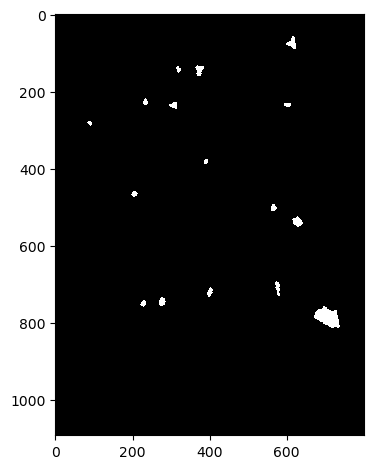

In [194]:
io.imshow(filtered_image)

# ejercicio 11

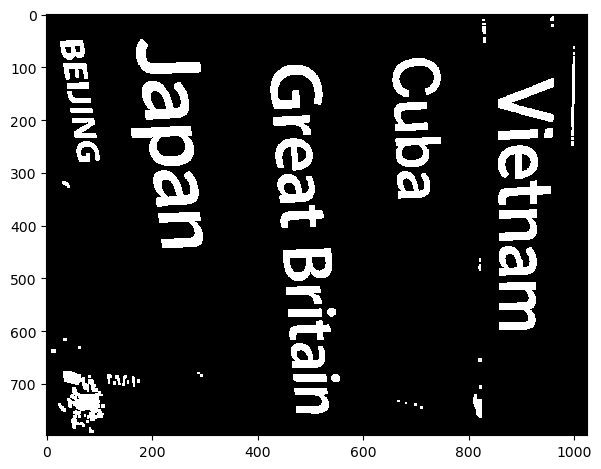

In [203]:
in_dir = "./data"
im_name = "/books_bw.png"
im = io.imread(in_dir + im_name)
im_books_bw = img_as_ubyte(im)
io.imshow(im_books_bw)

In [204]:
im_books_bw.dtype

dtype('uint8')

In [205]:
label_img = measure.label(im_books_bw, connectivity=2)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 78


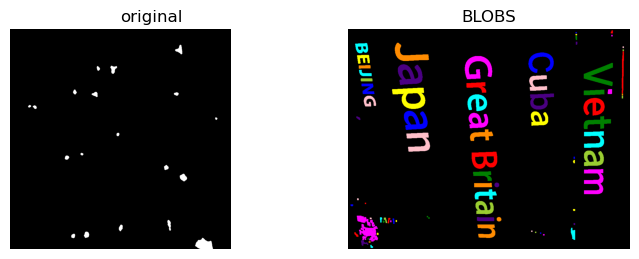

In [206]:
im_blob = label2rgb(label_img)
plot_comparison(img_no_border, im_blob, 'BLOBS')

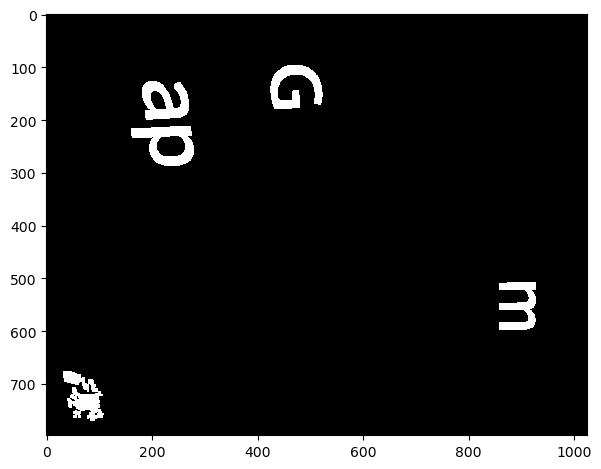

In [211]:
# Calculate area and perimeter of each BLOB
properties = measure.regionprops(label_img)

# Create a mask to filter BLOBs based on area and perimeter
filtered_labels = [prop.label for prop in properties if (prop.area > 100) and (prop.perimeter > 500)]

# Create a mask to keep only the BLOBs with area > 100 and perimeter > 500
filtered_image = np.isin(label_img, filtered_labels)

# Create a visualization of the final image with visible letters
result_image = img_as_ubyte(filtered_image)

# Display or save the result image as needed
io.imshow(filtered_image)
io.show()

# ejercicio 14 - exacto
12 y 13 son de matlab

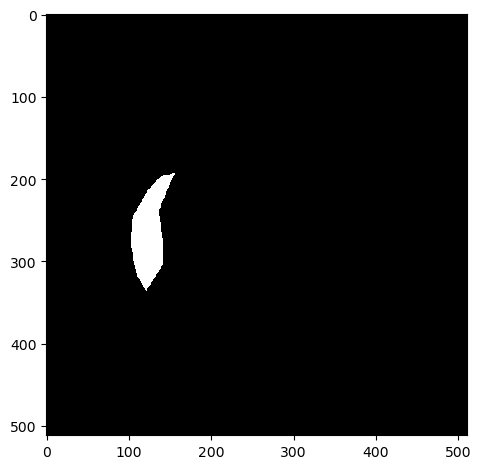

In [31]:
in_dir = "./data"
im_name = "/LiverROI.png"
liver_roi = io.imread(in_dir + im_name)
liver_roi = img_as_ubyte(liver_roi)
io.imshow(liver_roi)

In [5]:
in_dir = "data/"
ct = dicom.read_file(in_dir + '1-179.dcm')
img_dcm = ct.pixel_array
print(img_dcm.shape)
print(img_dcm.dtype)

(512, 512)
int16


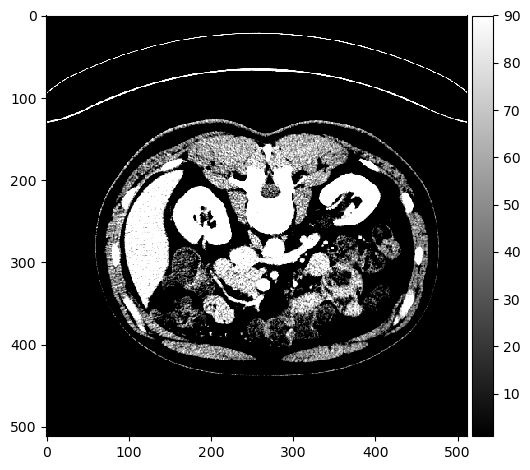

In [6]:
io.imshow(img_dcm, vmin=1, vmax=90, cmap='gray')
io.show()

In [35]:
liver_mask = liver_roi > 0
liver_values = img_dcm[liver_mask]
mu_liver = liver_values.mean()
std_liver = liver_values.std()
print("mean:", mu_liver)
print("std:", std_liver)

mean: 111.3621127475876
std: 18.765720528215887


In [41]:
# A low threshold, T1, is defined as the average value minus the standard
# deviation and a high threshold, T2, is defined as the average value plus the standard
# deviation.
t1 = mu_liver-std_liver
print("t1:", t1)
t2 = mu_liver+std_liver
print("t2:", t2)

t1: 92.59639221937172
t2: 130.12783327580348


In [45]:
def th_dicom_image(im, t1, t2):
    binary_mask = (im >= t1) & (im <= t2)
    mask2 = img_as_ubyte(binary_mask)
    foreground_px = np.sum(mask2 == 255)
    return mask2, foreground_pixels

Foreground px:  8984


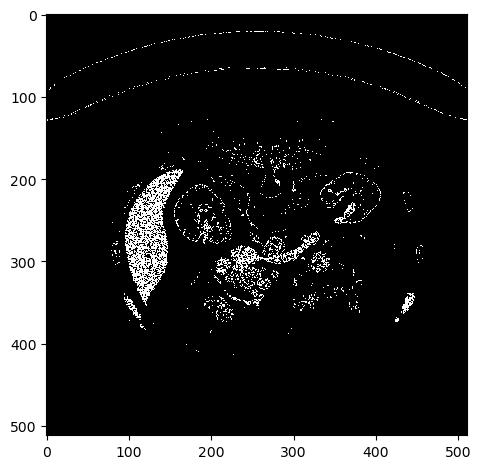

In [46]:
im_liver, px_foreground = th_dicom_image(img_dcm, t1, t2)
print("Foreground px: ", px_foreground)
io.imshow(im_liver)

# ejercicio 15 - ojo no te da como el resultado del examen

In [ ]:
def th_dicom_image(im, t1, t2):
    binary_mask = (im >= t1) & (im <= t2)
    mask2 = img_as_ubyte(binary_mask)
    foreground_px = np.sum(mask2 == 255)
    return mask2, foreground_pixels

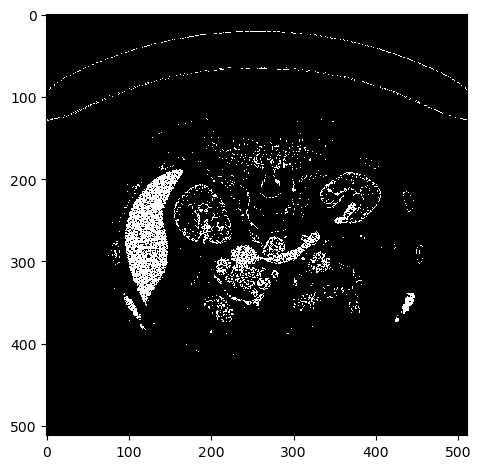

In [48]:
im_liver, px_foreground = th_dicom_image(img_dcm, 90, 140)
io.imshow(im_liver)

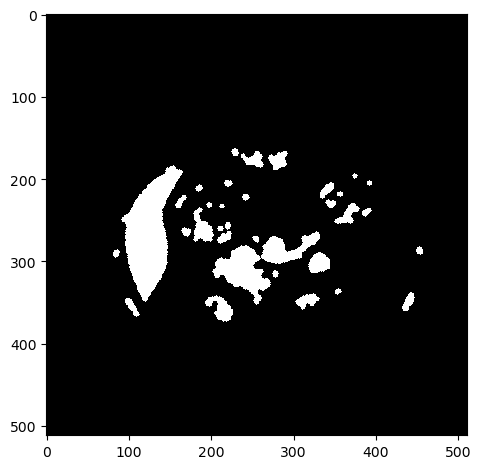

In [51]:
def apply_opening(binary, disk_sz):
    footprint = disk(disk_sz)
    opened = opening(binary, footprint)
    return opened

def apply_closing(binary, disk_sz):
    footprint = disk(disk_sz)
    closed = closing(binary, footprint)
    return closed

liver_closed = apply_closing(im_liver, 3)
liver_opened = apply_opening(liver_closed, 3)
io.imshow(liver_opened)

In [52]:
label_img = measure.label(liver_opened, connectivity=2)
n_labels = label_img.max()

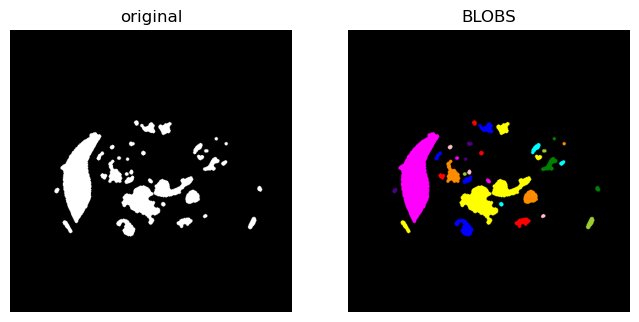

In [53]:
im_blob = label2rgb(label_img)
plot_comparison(liver_opened, im_blob, 'BLOBS')

In [55]:
# Find the properties of the labeled regions
regions = measure.regionprops(label_img)

# Find the largest blob
largest_blob = max(regions, key=lambda r: r.area)

# Find the area (in pixels) of the largest blob
largest_blob_area = largest_blob.area

print("Area of the largest BLOB:", largest_blob_area)

Area of the largest BLOB: 6032.0


**linea de largest_blob** Aquí, se busca el blob más grande en la lista de regiones (regions). La función max se utiliza con un argumento clave (key) que especifica cómo se debe realizar la comparación. En este caso, se compara el área de cada región (el atributo r.area) para encontrar la región con el área más grande. largest_blob contendrá el objeto de la región más grand


# ejercicio 16

In [ ]:
mean_1 = 7
std_dev_1 = 2

mean_2 = 15
std_dev_2 = 5

mean_3 = 3.5
std_dev_3 = 5

"""
para calcular la minimun distance classifier simplemente 
1. Ordena las medias en orden creciente
2. Calcula los thresholds entre dos clases, en este caso:
    -> 3.5 | 7 | 15 --> 3.5+7/2= 5.35 ,,, 7+15/2=11
    
    Resultado 5 y 11
"""



# ejercicio 17

In [13]:
# In case we are directly given the parametric distributions: N(mean,std). 
# NASA exercise exam spring 2021

# Define the Gaussian PDFs for each class
mean_category1 = 7
std_category1 = 2

mean_category2 = 15
std_category2 = 5

mean_category3 = 3
std_category3 = 5

pdf_category1 = stats.norm(loc=mean_category1, scale=std_category1)
pdf_category2 = stats.norm(loc=mean_category2, scale=std_category2)
pdf_category3 = stats.norm(loc=mean_category3, scale=std_category3)

# Define a function to find the intersection points
def find_intersection(x):
    return pdf_category1.pdf(x) - pdf_category3.pdf(x)

intersection_point_categories31 = fsolve(find_intersection, x0=(mean_category3 + mean_category1) / 2)
intersection_point_categories31

def find_intersection(x):
    return pdf_category2.pdf(x) - pdf_category1.pdf(x)

intersection_point_categories21 = fsolve(find_intersection, x0=(mean_category2 + mean_category1) / 2)
intersection_point_categories21

print(f'The thresholds used should be: {intersection_point_categories31[0]}, and {intersection_point_categories21[0]}')

The thresholds used should be: 4.246979967171141, and 10.296880266472597


In [ ]:
image = np.array([[167, 193, 180],
                 [9, 189, 8],
                 [217, 100, 71]])

template = np.array([[208, 233, 71],
                 [231, 161, 139],
                 [32, 25, 244]])

# ejercicio 18

In [32]:
def ncc(arr1, arr2):
    # Multiplicación elemento por elemento y luego suma
    correlation = np.sum(arr1 * arr2)
    lenght1 = np.sqrt(np.sum(arr1**2))
    lenght2 = np.sqrt(np.sum(arr2**2))
    
    ncc = correlation / (lenght1*lenght2)
    return ncc

image = np.array([[167, 193, 180],
                 [9, 189, 8],
                 [217, 100, 71]])

template = np.array([[208, 233, 71],
                 [231, 161, 139],
                 [32, 25, 244]])

ncc_value = ncc(image, template)
print(f'El valor de correlación es: {ncc_value}')

El valor de correlación es: 0.6749205114127521


# ejercicio 19

In [33]:
def camera_b_distance(f, g):
    """
    camera_b_distance returns the distance (b) where the CCD should be placed
    when the object distance (g) and the focal length (f) are given
    :param f: Focal length in mm
    :param g: Object distance in m
    :return: b, the distance where the CCD should be placed
    """
    f_meters = f/1000
    b = 1 / ((1 / f_meters) - 1 / g)
    # b = 1 / (f**(-1) - g**-(1))
    print(f"El valor de b es: {b:.6f}m")
    return(b)

In [34]:
# G = 1.8
f = 10 #mm
#la funcion obtiene los mm del focal length
g = 1.1 #m

print("Answer 1:")
b = camera_b_distance(f,g)
# print()
# print("Answer 2: ")
# B = ((b * G)/g) * 1000
# print(f"The height of Thomas (mm) in the CCD-chip is {B:.7f} mm")

Answer 1:
El valor de b es: 0.010092m
